In [66]:
#Importamos librerias
import pandas as pd
import re

import regex
import demoji

import numpy as np
from collections import Counter

import plotly.express as px
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import streamlit as st
from pathlib import Path

In [67]:
# Cargar el archivo Libro1.csv si existe
Progreso_ind_file = Path("Progreso.csv")
if Progreso_ind_file.is_file():
    Progreso_ind = pd.read_csv(Progreso_ind_file, sep=';')
else:
    Progreso_ind = pd.DataFrame()

In [68]:
#Definimos las funciones
def formulario_desarrollo_fuerza(sets):
    pesos = [float(input(f'Peso para el set {i+1}:')) for i in range(sets)]
    repeticiones = int(input('Repeticiones:'))
    descanso = input('Tiempo de descanso: (1-2 min, 2-3 min, 3-4 min)')
    return pesos, [repeticiones] * sets, [descanso] * sets

def formulario_mejora_resistencia(sets):
    pesos = [float(input(f'Peso para el set {i+1}:')) for i in range(sets)]
    repeticiones = [int(input(f'Repeticiones para el set {i+1}:')) for i in range(sets)]
    descanso = input('Tiempo de descanso: (1-2 min, 2-3 min, 3-4 min)')
    return pesos, repeticiones, [descanso] * sets

def formulario_hipertrofia_muscular(sets):
    peso = float(input('Peso (kg):'))
    repeticiones = int(input('Repeticiones:'))
    descanso = input('Tiempo de descanso: (1-2 min, 2-3 min, 3-4 min)')
    return [peso] * sets, [repeticiones] * sets, [descanso] * sets

In [69]:
print('Nuestro progreso en el Gimnasio 💪')

# Registro de datos
show_enfoque_form = input("¿Deseas abrir el formulario principal? (Si/No): ").lower() == "si"
if show_enfoque_form:
    Dia = input('Ingresa el Día 📆:')
    Persona = input('Selecciona tu nombre 🤵‍♂️🙍: (Carlos/Cinthia)')
    Maquina = input('Selecciona una máquina 🏋️‍♀️🏋️‍♂️: (Prensa de Piernas, Multipowers, Máquina de Extensión de Cuádriceps, Máquina de Femorales, Máquina de Aductores, Máquina de Abductores)')
    Enfoque = input('Selecciona el enfoque de entrenamiento: (Desarrollo de Fuerza, Mejora de la Resistencia, Hipertrofia Muscular)')
    sets = int(input('Número de sets:'))

    if Enfoque == 'Desarrollo de Fuerza':
        pesos, repeticiones, descansos = formulario_desarrollo_fuerza(sets)
    elif Enfoque == 'Mejora de la Resistencia':
        pesos, repeticiones, descansos = formulario_mejora_resistencia(sets)
    else:
        pesos, repeticiones, descansos = formulario_hipertrofia_muscular(sets)

    form_completo = all(pesos) and all(repeticiones) and all(descansos)

    if form_completo:
        for peso, repeticion, descanso in zip(pesos, repeticiones, descansos):
            Progreso_new = {'Dia': Dia, 'Persona': Persona, 'Maquina': Maquina, 'Peso': peso, 'Descanso': descanso, 'Sets': sets, 'Repeticiones': repeticion}
            Progreso_ind = pd.concat([Progreso_ind, pd.DataFrame([Progreso_new])], ignore_index=True)

        Progreso_ind['Sets'] = Progreso_ind.groupby(['Dia', 'Persona', 'Maquina', 'Peso', 'Descanso', 'Repeticiones'])['Peso'].transform('size')
        Progreso_ind.to_csv('Progreso.csv', index=False, sep=';')
        print('¡Datos registrados con éxito!')
    else:
        print('Por favor completa todos los campos del formulario.')

Nuestro progreso en el Gimnasio 💪


In [70]:
# Visualización de datos
print("Visualización de datos registrados")
unique_values = Progreso_ind.drop_duplicates(subset=['Dia', 'Persona', 'Maquina', 'Peso', 'Descanso', 'Repeticiones'])
print(unique_values[['Dia', 'Persona', 'Maquina', 'Peso', 'Descanso', 'Sets', 'Repeticiones']].to_string(index=False))

Visualización de datos registrados
 Dia Persona                   Maquina  Peso Descanso  Sets  Repeticiones
   1  Carlos            Press de pecho    26  2-3 min     1            15
   1  Carlos            Press de pecho    33  2-3 min     1            15
   1  Carlos            Press de pecho    38  2-3 min     1            15
   1 Cinthia            Press de pecho     5  2-3 min     1            15
   1 Cinthia            Press de pecho    12  2-3 min     4            15
   1  Carlos       Extension de hombro    15  2-3 min     3            15
   1 Cinthia       Extension de hombro     5  2-3 min     3            15
   1  Carlos Extension tricep en polea    13  2-3 min     1            15
   1  Carlos Extension tricep en polea    16  2-3 min     3            15
   1 Cinthia Extension tricep en polea     6  2-3 min     4            15
   1  Carlos         Extension lateral     6  2-3 min     3            10
   1 Cinthia         Extension lateral     1  2-3 min     3            10
   

Comparación de progreso entre personas


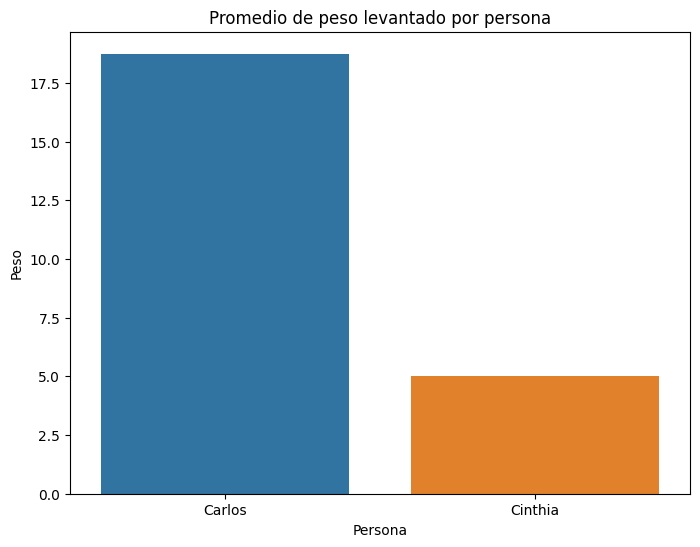

In [78]:
# Gráfico de comparación entre personas
print("Comparación de progreso entre personas")
avg_peso = Progreso_ind.groupby('Persona')['Peso'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_peso, x='Persona', y='Peso', hue='Persona')
plt.title('Promedio de peso levantado por persona')
plt.show()

Histograma de repeticiones por máquina y persona


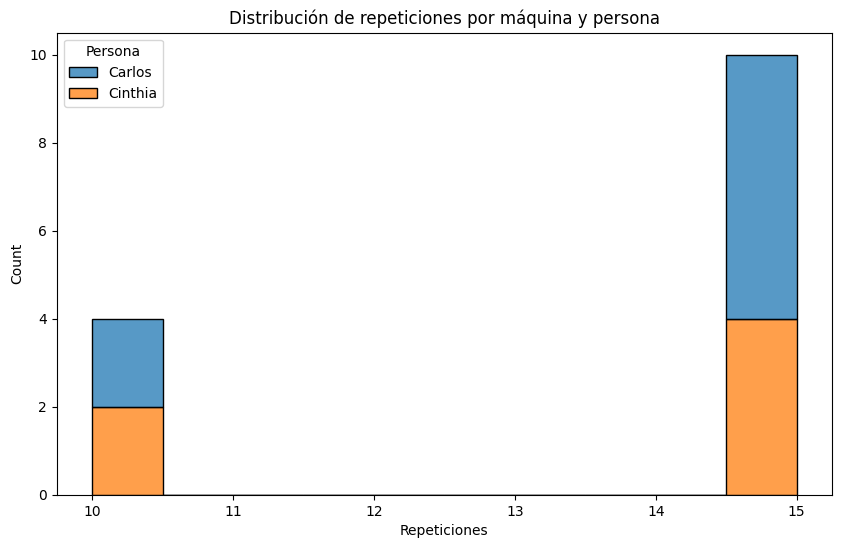

In [72]:
# Histograma de repeticiones por máquina y persona
print("Histograma de repeticiones por máquina y persona")
plt.figure(figsize=(10, 6))
sns.histplot(data=Progreso_ind, x='Repeticiones', hue='Persona', multiple='stack', bins=10)
plt.title('Distribución de repeticiones por máquina y persona')
plt.show()

Box plot de pesos por día y persona


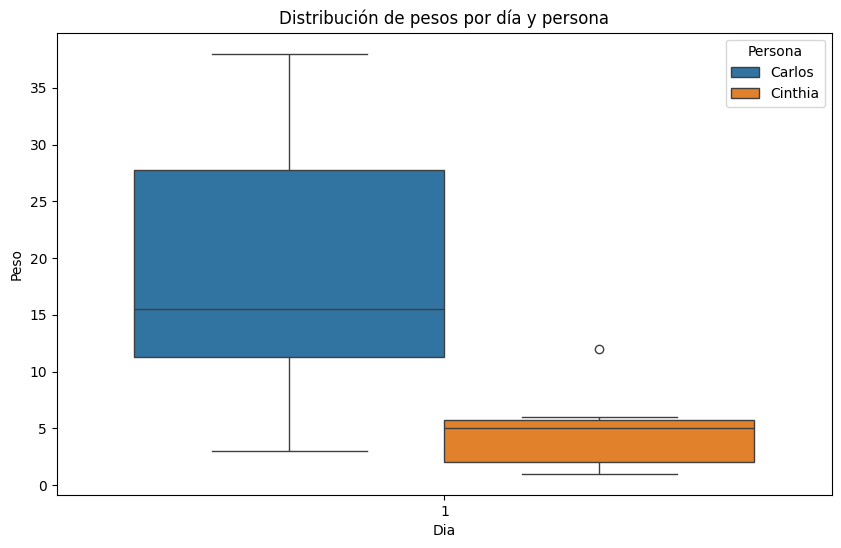

In [73]:
# Box plot de pesos por día y persona
print("Box plot de pesos por día y persona")
plt.figure(figsize=(10, 6))
sns.boxplot(data=Progreso_ind, x='Dia', y='Peso', hue='Persona')
plt.title('Distribución de pesos por día y persona')
plt.show()

Gráfico de línea de series por día


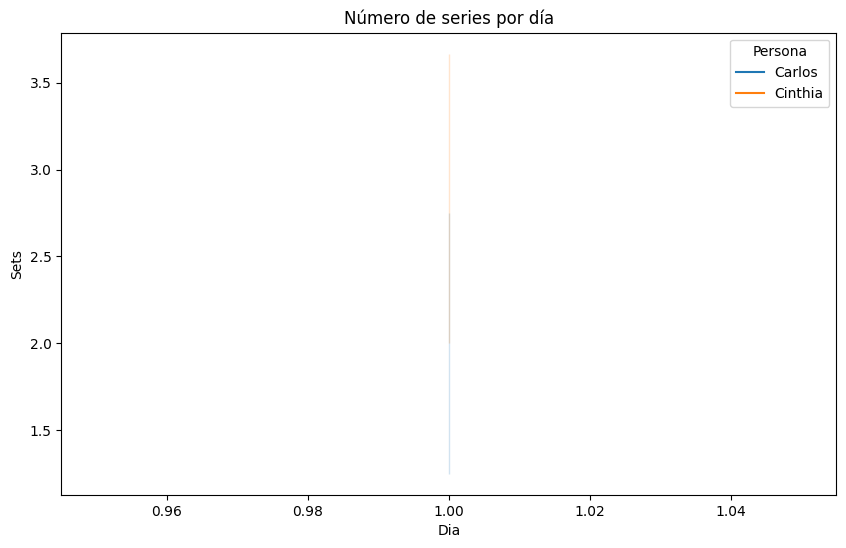

In [74]:
# Gráfico de línea de series por día
print("Gráfico de línea de series por día")
plt.figure(figsize=(10, 6))
sns.lineplot(data=Progreso_ind, x='Dia', y='Sets', hue='Persona', markers=True)
plt.title('Número de series por día')
plt.show()

Diagrama de dispersión de peso vs repeticiones


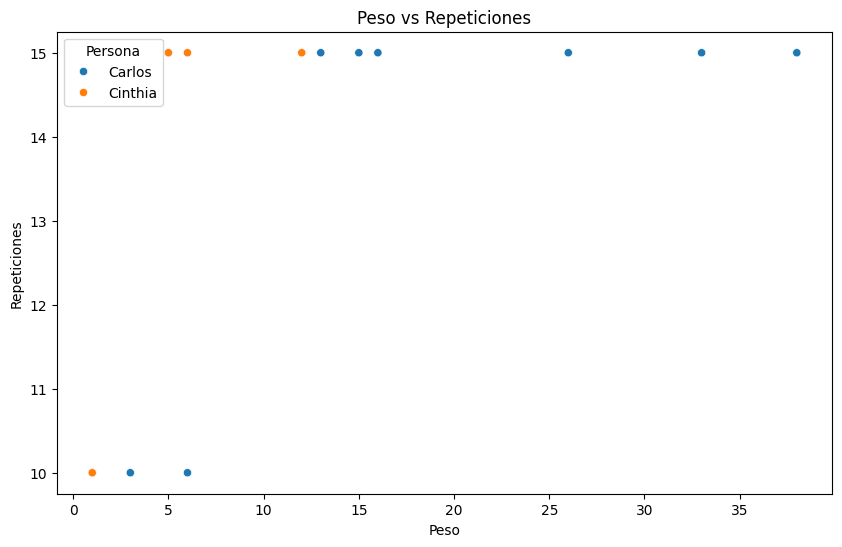

In [75]:
# Diagrama de dispersión de peso vs repeticiones
print("Diagrama de dispersión de peso vs repeticiones")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Progreso_ind, x='Peso', y='Repeticiones', hue='Persona')
plt.title('Peso vs Repeticiones')
plt.show()